# Assignment 5

In this assignment, you'll scrape text from [The California Aggie](https://theaggie.org/) and then analyze the text.

The Aggie is organized by category into article lists. For example, there's a [Campus News](https://theaggie.org/campus/) list, [Arts & Culture](https://theaggie.org/arts/) list, and [Sports](https://theaggie.org/sports/) list. Notice that each list has multiple pages, with a maximum of 15 articles per page.

The goal of exercises 1.1 - 1.3 is to scrape articles from the Aggie for analysis in exercise 1.4.

__Exercise 1.1.__ Write a function that extracts all of the links to articles in an Aggie article list. The function should:

* Have a parameter `url` for the URL of the article list.

* Have a parameter `page` for the number of pages to fetch links from. The default should be `1`.

* Return a list of aricle URLs (each URL should be a string).

Test your function on 2-3 different categories to make sure it works.

Hints:

* Be polite to The Aggie and save time by setting up [requests_cache](https://pypi.python.org/pypi/requests-cache) before you write your function.

* Start by getting your function to work for just 1 page. Once that works, have your function call itself to get additional pages.

* You can use [lxml.html](http://lxml.de/lxmlhtml.html) or [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) to scrape HTML. Choose one and use it throughout the entire assignment.

In [4]:
import requests
import requests_cache
requests_cache.install_cache('a_cache')

from bs4 import BeautifulSoup

In [2]:
def aggie_list(url, page=1):
    """
    Extract the links to articles in an Aggie article list.
    Input: url (the URL of the article list, string), page(the number of pages to fetch links from, int(default 1))
    Output: a list of article URLs
    """
    result = []
    for i in range(1,page+1):
        if i == 1:
            response = requests.get(url)
        else:
            try:
                response = requests.get(url+"page/"+str(i)+"/")
            except:
                break
        aggie = BeautifulSoup(response.content, 'html.parser')
        l1 = aggie.find_all("div", class_="grid_elements")
        l2 = [item.find_all("a") for item in l1]
        result += [item[0].get("href") for item in l2]
    return result

In [5]:
aggie_list("https://theaggie.org/campus/",2)

[u'https://theaggie.org/2017/02/24/2017-winter-quarter-election-results/',
 u'https://theaggie.org/2017/02/23/university-of-california-davis-city-council-sever-wells-fargo-contracts/',
 u'https://theaggie.org/2017/02/23/academics-unite-in-peaceful-rally-against-immigration-ban/',
 u'https://theaggie.org/2017/02/23/memorial-union-to-reopen-spring-quarter/',
 u'https://theaggie.org/2017/02/23/asucd-president-alex-lee-vetoes-amendment-for-creation-of-judicial-council/',
 u'https://theaggie.org/2017/02/22/senate-candidate-zaki-shaheen-withdraws-from-race/',
 u'https://theaggie.org/2017/02/21/uc-davis-experiences-several-recent-hate-based-crimes/',
 u'https://theaggie.org/2017/02/21/uc-president-selects-gary-may-as-new-uc-davis-chancellor/',
 u'https://theaggie.org/2017/02/20/katehi-controversy-prompts-decline-of-uc-administrators-seeking-profitable-subsidiary-board-positions/',
 u'https://theaggie.org/2017/02/20/asucd-senate-passes-resolution-submitting-comments-on-lrdp/',
 u'https://theag

__Exercise 1.2.__ Write a function that extracts the title, text, and author of an Aggie article. The function should:

* Have a parameter `url` for the URL of the article.

* For the author, extract the "Written By" line that appears at the end of most articles. You don't have to extract the author's name from this line.

* Return a dictionary with keys "url", "title", "text", and "author". The values for these should be the article url, title, text, and author, respectively.

For example, for [this article](https://theaggie.org/2017/02/14/project-toto-aims-to-address-questions-regarding-city-finances/) your function should return something similar to this:
```
{
    'author': u'Written By: Bianca Antunez \xa0\u2014\xa0city@theaggie.org',
    'text': u'Davis residents create financial model to make city\'s financial state more transparent To increase transparency between the city\'s financial situation and the community, three residents created a model called Project Toto which aims to improve how the city communicates its finances in an easily accessible design. Jeff Miller and Matt Williams, who are members of Davis\' Finance and Budget Commission, joined together with Davis entrepreneur Bob Fung to create the model plan to bring the project to the Finance and Budget Commission in February, according to Kelly Stachowicz, assistant city manager. "City staff appreciate the efforts that have gone into this, and the interest in trying to look at the city\'s potential financial position over the long term," Stachowicz said in an email interview. "We all have a shared goal to plan for a sound fiscal future with few surprises. We believe the Project Toto effort will mesh well with our other efforts as we build the budget for the next fiscal year and beyond." Project Toto complements the city\'s effort to amplify the transparency of city decisions to community members. The aim is to increase the understanding about the city\'s financial situation and make the information more accessible and easier to understand. The project is mostly a tool for public education, but can also make predictions about potential decisions regarding the city\'s financial future. Once completed, the program will allow residents to manipulate variables to see their eventual consequences, such as tax increases or extensions and proposed developments "This really isn\'t a budget, it is a forecast to see the intervention of these decisions," Williams said in an interview with The Davis Enterprise. "What happens if we extend the sales tax? What does it do given the other numbers that are in?" Project Toto enables users, whether it be a curious Davis resident, a concerned community member or a city leader, with the ability to project city finances with differing variables. The online program consists of the 400-page city budget for the 2016-2017 fiscal year, the previous budget, staff reports and consultant analyses. All of the documents are cited and accessible to the public within Project Toto. "It\'s a model that very easily lends itself to visual representation," Mayor Robb Davis said. "You can see the impacts of decisions the council makes on the fiscal health of the city." Complementary to this program, there is also a more advanced version of the model with more in-depth analyses of the city\'s finances. However, for an easy-to-understand, simplistic overview, Project Toto should be enough to help residents comprehend Davis finances. There is still more to do on the project, but its creators are hard at work trying to finalize it before the 2017-2018 fiscal year budget. "It\'s something I have been very much supportive of," Davis said. "Transparency is not just something that I have been supportive of but something we have stated as a city council objective [ ] this fits very well with our attempt to inform the public of our challenges with our fiscal situation." ',
    'title': 'Project Toto aims to address questions regarding city finances',
    'url': 'https://theaggie.org/2017/02/14/project-toto-aims-to-address-questions-regarding-city-finances/'
}
```

Hints:

* The author line is always the last line of the last paragraph.

*   Python 2 displays some Unicode characters as `\uXXXX`. For instance, `\u201c` is a left-facing quotation mark.
    You can convert most of these to ASCII characters with the method call (on a string)
    ```
    .translate({ 0x2018:0x27, 0x2019:0x27, 0x201C:0x22, 0x201D:0x22, 0x2026:0x20 })
    ```
    If you're curious about these characters, you can look them up on [this page](http://unicode.org/cldr/utility/character.jsp), or read 
    more about [what Unicode is](http://unicode.org/standard/WhatIsUnicode.html).

In [167]:
def aggie_article(url):
    """
    Extracts the title, text, and author of an Aggie article.
    Input: url (the URL of the article, string)
    Output: A dictionary with keys "url", "title", "text", and "author". The values for these are the article url, title, text, and author, respectively.
    """
    response = requests.get(url)
    article = BeautifulSoup(response.content, 'html.parser')
    try:
        title = article.find_all("h1", class_="entry-title")[0].get_text()
    except:
        title = ''
    
    try:
        body = [item.get_text().translate({ 0x2018:0x27, 0x2019:0x27, 0x201C:0x22, 0x201D:0x22, 0x2026:0x20 }) for item in article.find_all("div",itemprop="articleBody")[0].find_all("p")]
        special = body[-1].split("\n") #Sometimes the last paragraph and the author are in the same <p> </p>, with "\n" in between.
        if special[-1].lower().startswith("written by:"): #Some articles lack the information about the author.
            author = special[-1]
            text = " ".join(body[0:(len(body)-1)]+special[0:(len(special)-1)])
        else:
            author = ""
            text = " ".join(body[0:(len(body)-1)]+special)
    except:
        body = ''
        author = ''
    result = {"author":author, "text":text, "title":title, "url":url}
    return result

In [7]:
aggie_article("https://theaggie.org/2017/02/14/project-toto-aims-to-address-questions-regarding-city-finances/")

{'author': u'Written By: Bianca Antunez \xa0\u2014\xa0city@theaggie.org',
 'text': u'Davis residents create financial model to make city\'s financial state more transparent To increase transparency between the city\'s financial situation and the community, three residents created a model called Project Toto which aims to improve how the city communicates its finances in an easily accessible design.  Jeff Miller and Matt Williams, who are members of Davis\' Finance and Budget Commission, joined together with Davis entrepreneur Bob Fung to create the model plan to bring the project to the Finance and Budget Commission in February, according to Kelly Stachowicz, assistant city manager.  "City staff appreciate the efforts that have gone into this, and the interest in trying to look at the city\'s potential financial position over the long term," Stachowicz said in an email interview. "We all have a shared goal to plan for a sound fiscal future with few surprises. We believe the Project Tot

__Exercise 1.3.__ Use your functions from exercises 1.1 and 1.2 to get a data frame of 60 [Campus News](https://theaggie.org/campus/) articles and a data frame of 60 [City News](https://theaggie.org/city/) articles. Add a column to each that indicates the category, then combine them into one big data frame.

The "text" column of this data frame will be your corpus for natural language processing in exercise 1.4.

In [8]:
import pandas as pd

In [9]:
def aggie_get_articles(url, page, category):
    """
    Get a data frame of articles.
    Input: url(the URL of the article list, string), page(the number of pages to fetch links from, int(default 1)), category(the category of articles, string)
    Output: A pandas.DataFrame which includes each article's author, text, title, url and category.
    """
    list_of_articles = aggie_list(url,page)
    articles = pd.DataFrame()
    for i in range(len(list_of_articles)):
        new = pd.DataFrame(aggie_article(list_of_articles[i]),index=[i])
        articles = pd.concat([articles,new])
    
    articles["category"] = category
    return articles

In [191]:
campus = aggie_get_articles("https://theaggie.org/campus/", page=4, category="Campus News")
campus.head()

,author,text,title,url,category
0,Written by: Alyssa Vandenberg — campus@theagg...,"Six senators, new executive team elected Curre...",2017 Winter Quarter election results,https://theaggie.org/2017/02/24/2017-winter-qu...,Campus News
1,Written by: Aaron Liss and Raul Castellanos —...,"Wells Fargo faces fraud, predatory lending cha...","University of California, Davis City Council s...",https://theaggie.org/2017/02/23/university-of-...,Campus News
2,Written by: Kimia Akbari — campus@theaggie.org,"Faculty, students recount personal tales of im...",Academics unite in peaceful rally against immi...,https://theaggie.org/2017/02/23/academics-unit...,Campus News
3,Written by: Kenton Goldsby — campus@theaggie.org,Opening date pushed back to May 1 Students hav...,Memorial Union to reopen Spring Quarter,https://theaggie.org/2017/02/23/memorial-union...,Campus News
4,,Veto included revision abandoning creation of ...,ASUCD President Alex Lee vetoes amendment for ...,https://theaggie.org/2017/02/23/asucd-presiden...,Campus News


<p>Some articles have different html structure. They put the author out of the "articleBody". I did not use all the paragraphs in the article because the comments of articles is hard to process.</p>

In [192]:
city = aggie_get_articles("https://theaggie.org/city/",page=4, category="City News")
city.head()

,author,text,title,url,category
0,Written by: Kaelyn Tuermer-Lee — city@theaggie...,Local Whole Foods closes Feb. 12 After five ye...,Davis’ Whole Foods Market shuts down,https://theaggie.org/2017/02/23/davis-whole-fo...,City News
1,Written By: Anya Rehon — city@theaggie.org,Demonstrations take place at hundreds of Plann...,Protest against Planned Parenthood in Woodland...,https://theaggie.org/2017/02/23/protest-agains...,City News
2,Written By: Bianca Antunez — city@theaggie.org,California Redevelopment Agencies require Davi...,Davis’s Historic City Hall building to be put ...,https://theaggie.org/2017/02/23/daviss-histori...,City News
3,Written by: Caitlyn Sampley — city@theaggie.org,Davis residents show solidarity in wake of tra...,Davis stands with Muslim residents,https://theaggie.org/2017/02/21/davis-stands-w...,City News
4,Written By: Anya Rehon — city@theaggie.org,"CalRecycle donates $197,851 The City of Davis ...",City of Davis awarded funds for new recycling ...,https://theaggie.org/2017/02/20/city-of-davis-...,City News


In [12]:
mydata = pd.concat([city,campus])

__Exercise 1.4.__ Use the Aggie corpus to answer the following questions. Use plots to support your analysis.

* What topics does the Aggie cover the most? Do city articles typically cover different topics than campus articles?

* What are the titles of the top 3 pairs of most similar articles? Examine each pair of articles. What words do they have in common?

* Do you think this corpus is representative of the Aggie? Why or why not? What kinds of inference can this corpus support? Explain your reasoning.

Hints:

*   The [nltk book](http://www.nltk.org/book/) and [scikit-learn documentation](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction) may be helpful here.

*   You can determine whether city articles are "near" campus articles from the similarity matrix or with k-nearest neighbors.

*   If you want, you can use the [wordcloud](http://amueller.github.io/word_cloud/) package to plot a word cloud. To install the package, run
    ```
    conda install -c https://conda.anaconda.org/amueller wordcloud
    ```
    in a terminal. Word clouds look nice and are easy to read, but are less precise than bar plots.

In [163]:
import numpy as np
import nltk
from nltk import corpus
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [14]:
import wordcloud
from wordcloud import WordCloud

<h4>1. What topics does the Aggie cover the most? Do city articles typically cover different topics than campus articles?</h4>

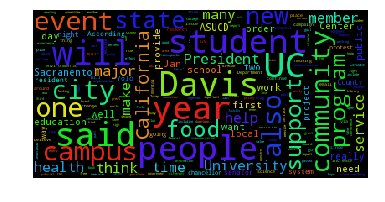

In [17]:
s = " ".join(mydata["text"])
wordcloud = WordCloud(max_font_size=40).generate(s)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

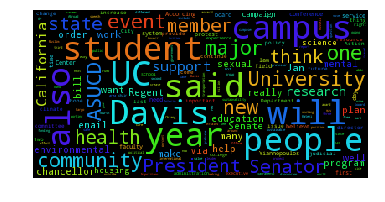

In [15]:
s1 = " ".join(campus["text"])
wordcloud = WordCloud(max_font_size=40).generate(s1)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

<p>We can see that the campus news focus on the events in UC Davis. For example, many articles are about ASUCD elections and its president and senators. Also, some articles present the attitudes of students towards political events.

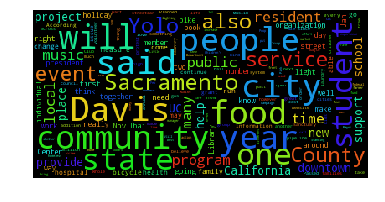

In [16]:
s2 = " ".join(city["text"])
wordcloud = WordCloud(max_font_size=40).generate(s2)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

<p>On the other hand, city news are more correlated to events in a lager community. For example, some articles focus on the events in the city of Davis, Sacramento or even Yolo County. And the topics can be daily life, festivals, economics, politics and so on.

In [18]:
stemmer = PorterStemmer().stem

tokenize = nltk.word_tokenize

def stem(tokens,stemmer = PorterStemmer().stem):
    return [stemmer(w.lower()) for w in tokens] 

def lemmatize(text):
    """
    Extract simple lemmas based on tokenization and stemming
    Input: string
    Output: list of strings (lemmata)
    """
    return stem(tokenize(text))

In [188]:
vectorizer = TfidfVectorizer(tokenizer=lemmatize,stop_words="english",smooth_idf=True,norm=None)

news = vectorizer.fit_transform([s1,s2])

In [190]:
dist = news[0,].dot(news[1,].T)[0,0]/((news[0,].dot(news[0,].T)[0,0])*(news[1,].dot(news[1,].T)[0,0]))**0.5
dist

0.9607417919241461

<p>Then I use cosine distance to measure the campus news and the city news. The cosine distance is close to 1. So in terms of word selection, they are very similar.</p>

<h4>2. What are the titles of the top 3 pairs of most similar articles? Examine each pair of articles. What words do they have in common?</h4>

In [149]:
aggie = list(mydata["text"])
tfs = vectorizer.fit_transform(aggie)

In [50]:
tfs.shape

(120, 5250)

In [150]:
word = vectorizer.get_feature_names()

In [27]:
position = {}
for i in xrange(119):
    for j in xrange(i+1,120):
        cos_dist = tfs[i,].dot(tfs[j,].T)[0,0]/((tfs[i,].dot(tfs[i,].T)[0,0])*(tfs[j,].dot(tfs[j,].T)[0,0]))**0.5
        position[cos_dist] = (i,j)

<p>Here I apply the cosine distance to measure the similarity between each 2 different articles.</p>

In [29]:
l = position.keys()
l = sorted(l,reverse=True)

In [30]:
similar = [position[dist] for dist in l[:3]]

In [31]:
for (i,j) in similar:
    print mydata["title"].iloc[i]
    print mydata["title"].iloc[j]
    print ' '

UC Davis holds first mental health conference
UC Davis to host first ever mental health conference
 
Protests erupt at Milo Yiannopoulos event
Davis College Republicans club leads protest against cancellation of Milo Yiannopoulos event
 
University of California Regents meet, approve first tuition raise in six years
UC Regents vote to raise tuition for UC campuses
 


<p>The articles in the first pair are both about the first mental health conference in UC Davis.
<p>The second pair is about protests against Milo Yiannopoulos event.
<p>The third pair is about the vote to raise tuition for UC.

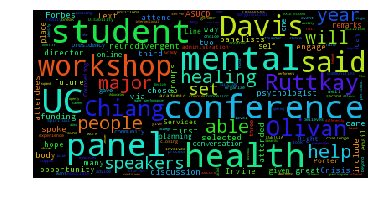

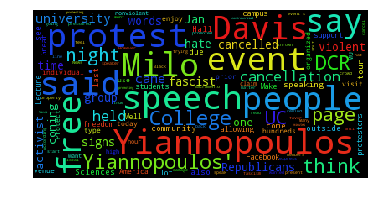

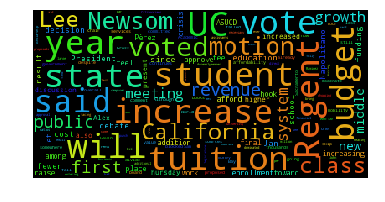

In [32]:
for (i,j) in similar:
    text = mydata["text"].iloc[i]+mydata["text"].iloc[j]
    wordcloud = WordCloud(max_font_size=40).generate(text)
    plt.figure()
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

<p>The articles about the mental health conference contain words like "mental", "health", "conference", "workshop", "panal" and so on.</p>
<p>The articles about the protest contain words like "Milo", "Yiannopoulos", "protest", "speech" and so on.</p>
<p>The articles about the vote contain words like "increase", "tuition", "budget", "vote", "regent" and so on.</p>

In [160]:
def common_words(i,j,n):
    """
    Return the first n common words of 2 articles.
    Input: i,j (the index of 2 articles in the Aggie corpus). n (the number of output words)
    Output: the first n common words.
    """
    from operator import itemgetter
    l = []
    for k in xrange(tfs.shape[1]):
        l.append((k,tfs[i,k]*tfs[j,k]))
    l = sorted(l, key=itemgetter(1), reverse=True)
    
    result = []
    for k in xrange(n):
        result.append(word[int(l[k][0])])
        
    return result

In [162]:
for (i,j) in similar:
    print " ".join(common_words(i,j,10))

confer mental health . panel , student workshop chiang heal
yiannopoulo protest . , speech cancel event milo '' ``
tuition increas vote . , regent $ newsom uc 336


<p>Then I define a function common_words to find the common words in 2 articles. If a word has large tf-idfs in both articles, the product of the 2 tf-idfs should be large. So I calculate the products of each word, and find the words with the largest products.</p>
<p>In the first pair of articles, we can find "confer", "mental", "health", "panal" and other words in common.</p>
<p>In the articles about protest, there are "yiannoloulo", "protest", "speech" and others.
<p>In the articles about vote on tuition increase, "tuition", "increas" (stemmed "increase") and "vote" rank top 3.</p>

<h4>3. Do you think this corpus is representative of the Aggie? Why or why not? What kinds of inference can this corpus support? Explain your reasoning.</h4>

<p>I do not think this corpus is representative. This corpus only contains the news of campus and city. It is kind of formal. However, there are other categories like sports, science, arts and culture. A more representative corpus should also include these categories.</p>
<p>If we want to focus on "formal" articles in the Aggie, then this corpus is proper.</p>
<p>Suppose we want to figure whether an article is about city or about campus, we can use this corpus as a training dataset to train a model. (KNN, for example)</p>